## Начало лабораторной

https://www.kaggle.com/datasets/nikhil1e9/goodreads-books?resource=download
Данный набор данных представляет книги с Goodreads
Примр цели — создание системы рекомендаций для книг, прогнозирование рейтингов для новых книг.
Входные данные: Название, Автор, Средняя оценка, Общее количество оценок, Количество добавлений на полки, Год публикации, Описание, Изображение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_books = pd.read_csv(".//static//csv//Popular-Books.csv")

print("Столбцы в Popular-Books:")
print(df_books.columns)

Столбцы в Popular-Books:
Index(['Title', 'Author', 'Score', 'Ratings', 'Shelvings', 'Published',
       'Description', 'Image'],
      dtype='object')


Посмотрим краткое содержание датасета.

In [2]:
print("Информация о датасете Popular-Books:")
df_books.info()
df_books.head()

Информация о датасете Popular-Books:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        27621 non-null  object 
 1   Author       27621 non-null  object 
 2   Score        27621 non-null  float64
 3   Ratings      27621 non-null  int64  
 4   Shelvings    27621 non-null  int64  
 5   Published    27621 non-null  int64  
 6   Description  27549 non-null  object 
 7   Image        27621 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


Title  \
0           The English Assassin (Gabriel Allon, #2)   
1                                            Pompeii   
2  Notorious RBG: The Life and Times of Ruth Bade...   
3                               The Abolition of Man   
4                             Portrait of a Murderer   

                       Author  Score  Ratings  Shelvings  Published  \
0                Daniel Silva   4.16    40122      44602       2002   
1             Robert   Harris   3.86    46097      64840       2003   
2                 Irin Carmon   4.19    59670     171959       2015   
3                  C.S. Lewis   4.11    34390      52770       1943   
4  Anne  Meredith (Pseudonym)   3.38     1129       1739       1933   

                                         Description  \
0  The Unlikely Spy, Daniel Silva's extraordinary...   
1  With his trademark elegance and intelligence R...   
2  You can't spell truth without Ruth.Only Ruth B...   
3  Alternative cover for ISBN: 978-0060652944The ...   
4  'Adrian Gray was born in May 1862 and met his ...   

                                               Image  
0  https://images-na.ssl-images-amazon.com/images...  
1  https://images-na.ssl-images-amazon.com/images...  
2  https://images-na.ssl-images-amazon.com/images...  
3  https://images-na.ssl-images-amazon.com/images...  
4  https://images-na.ssl-images-amazon.com/images...

Анализируем датафрейм при помощи "ящика с усами". Проверяет на пустые значения.

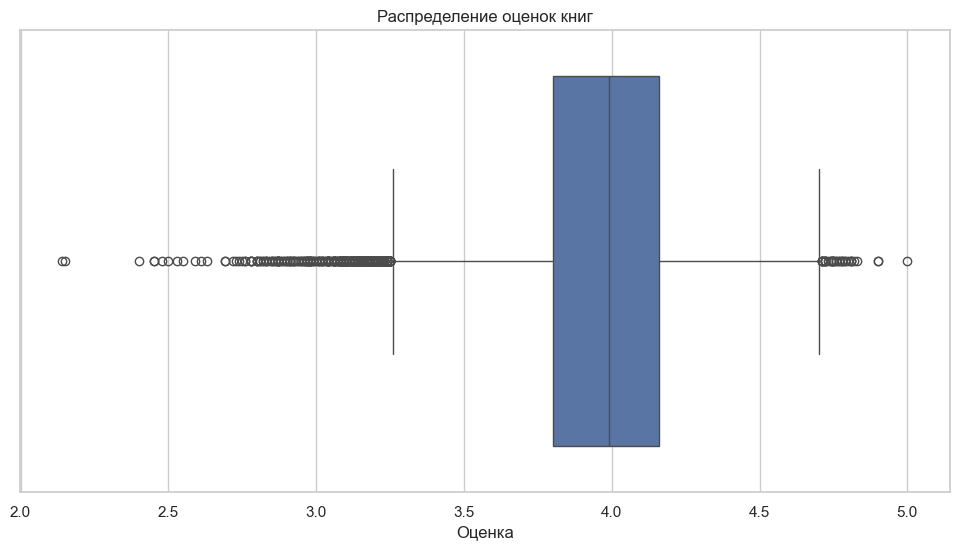

Проверка на пустые значения в наборе данных 'Popular Books':
Description    72
dtype: int64




In [3]:
# Настройка стиля графиков
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Score', data=df_books)
plt.title('Распределение оценок книг')
plt.xlabel('Оценка')
plt.show()

# Проверка на пустые значения для каждого набора данных
def check_missing_values(dataframe, name):
    missing_values = dataframe.isnull().sum()
    print(f"Проверка на пустые значения в наборе данных '{name}':")
    print(missing_values[missing_values > 0])  # Отображаем только столбцы с пропущенными значениями
    print("\n")

check_missing_values(df_books, "Popular Books") 

Удаляем все найденные пустые значения.

In [4]:
# Функция для удаления строк с пустыми значениями
def drop_missing_values(dataframe, name):
    before_shape = dataframe.shape  # Размер до удаления
    cleaned_dataframe = dataframe.dropna()  # Удаляем строки с пустыми значениями
    after_shape = cleaned_dataframe.shape  # Размер после удаления
    print(f"В наборе данных '{name}' было удалено {before_shape[0] - after_shape[0]} строк с пустыми значениями.")
    return cleaned_dataframe

cleaned_df_books = drop_missing_values(df_books, "Popular Books")

В наборе данных 'Popular Books' было удалено 72 строк с пустыми значениями.


Очистка данных от шумов

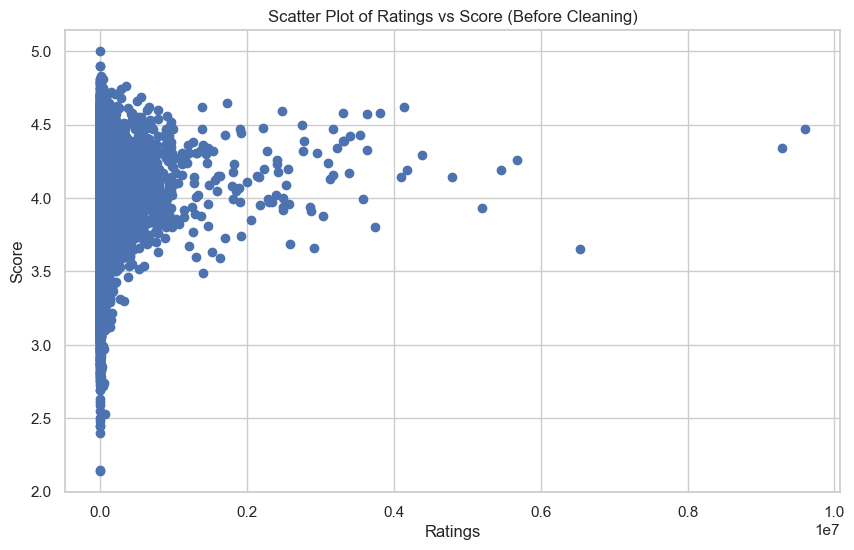

Выбросы в Popular Books:
                                      Title                Author  Score  \
32     The Nice Old Man and the Pretty Girl           Italo Svevo   3.11   
96                               The Killer  Stewart Edward White   3.22   
156                         The Three of Us   Ore Agbaje-Williams   2.98   
197                                Old Bugs        H.P. Lovecraft   2.82   
249                  Lair of the White Worm           Bram Stoker   2.78   
...                                     ...                   ...    ...   
27183                   The Mysterious Ship        H.P. Lovecraft   2.15   
27267                    Murder in the Snow       Gladys Mitchell   3.09   
27282                               The End        Samuel Beckett   3.18   
27527                                 Snuff       Chuck Palahniuk   3.22   
27618                            Mosquitoes      William Faulkner   3.11   

       Ratings  Shelvings  Published  \
32         728        

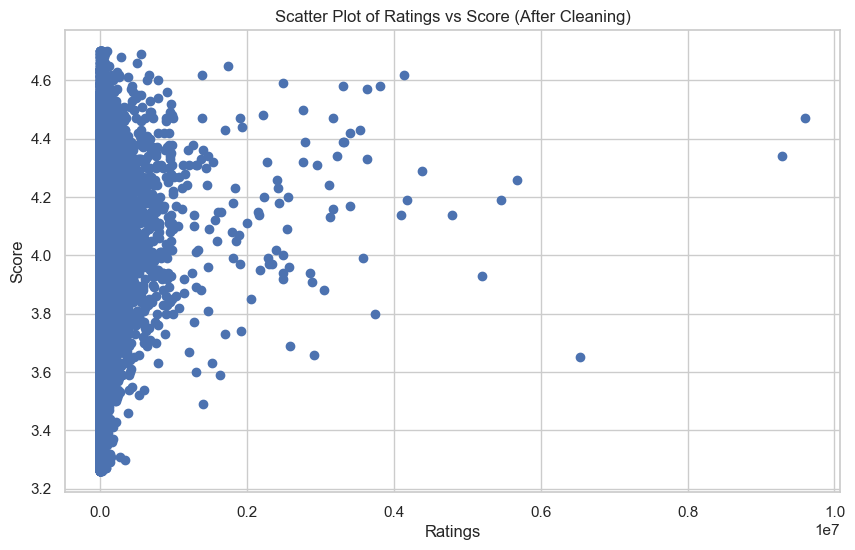

In [5]:
# Визуализация перед очисткой
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df_books['Ratings'], cleaned_df_books['Score'])
plt.xlabel('Ratings')
plt.ylabel('Score')
plt.title('Scatter Plot of Ratings vs Score (Before Cleaning)')
plt.show()

# Рассчитываем квартиль 1 (Q1) и квартиль 3 (Q3) для Score
Q1 = cleaned_df_books["Score"].quantile(0.25)
Q3 = cleaned_df_books["Score"].quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем порог для выбросов
threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

# Фильтруем выбросы
outliers = (cleaned_df_books["Score"] < lower_bound) | (cleaned_df_books["Score"] > upper_bound)

# Вывод выбросов
print("Выбросы в Popular Books:")
print(cleaned_df_books[outliers])

# Заменяем выбросы на медианные значения
median_score = cleaned_df_books["Score"].median()
cleaned_df_books.loc[outliers, "Score"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df_books['Ratings'], cleaned_df_books['Score'])
plt.xlabel('Ratings')
plt.ylabel('Score')
plt.title('Scatter Plot of Ratings vs Score (After Cleaning)')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [6]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(cleaned_df_books, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 16529
Размер контрольной выборки: 5510
Размер тестовой выборки: 5510


Видим недостаток баланса:

In [7]:
def check_balance(df, name):
    counts = df['Ratings'].value_counts()
    print(f"Распределение Ratings в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Ratings в обучающей выборке:
Ratings
70       18
55       18
16100    18
61       18
162      17
         ..
15370     1
4510      1
50015     1
24791     1
16244     1
Name: count, Length: 10844, dtype: int64

Распределение Ratings в контрольной выборке:
Ratings
86        9
246       8
66        8
83        8
237       8
         ..
15184     1
65771     1
6498      1
457617    1
316921    1
Name: count, Length: 4435, dtype: int64

Распределение Ratings в тестовой выборке:
Ratings
136       11
100       11
159        8
55         8
71         8
          ..
45669      1
2055       1
179534     1
16031      1
1108       1
Name: count, Length: 4428, dtype: int64



Используем oversample и undersample

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'Ratings')
val_df_oversampled = oversample(val_df, 'Ratings')
test_df_oversampled = oversample(test_df, 'Ratings')

train_df_undersampled = undersample(train_df, 'Ratings')
val_df_undersampled = undersample(val_df, 'Ratings')
test_df_undersampled = undersample(test_df, 'Ratings')

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение Ratings в обучающей выборке:
Ratings
2906      18
647       18
84803     18
52669     18
4880      18
          ..
6093      18
2341      18
29423     18
93667     18
224935    18
Name: count, Length: 10844, dtype: int64

Распределение Ratings в контрольной выборке:
Ratings
19873    9
224      9
1896     9
39208    9
9145     9
        ..
10122    9
132      9
53626    9
17870    9
88623    9
Name: count, Length: 4435, dtype: int64

Распределение Ratings в тестовой выборке:
Ratings
141477    11
1441      11
2471      11
17264     11
637349    11
          ..
556       11
20224     11
24353     11
719       11
7381      11
Name: count, Length: 4428, dtype: int64

Андерсэмплинг:
Распределение Ratings в обучающей выборке:
Ratings
9282201    1
1          1
2          1
3          1
4          1
          ..
19         1
18         1
17         1
16         1
15         1
Name: count, Length: 10844, dtype: int64

Распределение Ratings в контрольной выборке:
Ratin

https://www.kaggle.com/datasets/gallo33henrique/bitcoin-btc-usd-stock-dataset
Данный набор данных относится к анализу и прогнозированию финансовых временных рядов, связанных с криптовалютами.
Примр цели — разработка модели машинного обучения для прогнозирования цен на основе временных рядов.
Входные данные: Дата, Цена открытия на начало торговли, Самая высокая цена, Самая низкая цена, Цена закрытия в конце торговли, Скорректированная цена закрытия, Количество проданных.

In [9]:
df_btc = pd.read_csv(".//static//csv//BTC-USD_stock_data.csv")

print("Столбцы в Popular-Books:")
print(df_btc.columns)

Столбцы в Popular-Books:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Посмотрим краткое содержание датасета

In [10]:
# Добавляем бинарную переменную 'Price_Change': 'up' - цена выросла, 'down' - цена упала
df_btc['Price_Change'] = df_btc['Close'].diff(-1).apply(lambda x: 'up' if x < 0 else 'down')

# Удаляем строки с NaN значениями, возникшими из-за сдвига
df_btc.dropna()

# Вывод первых строк для проверки
print(df_btc[['Date', 'Close', 'Price_Change']].head())

print("\nИнформация о датасете BTC-USD:")
print(df_btc.info())
df_btc.head()

         Date        Close Price_Change
0  2017-01-01   998.325012           up
1  2017-01-02  1021.750000           up
2  2017-01-03  1043.839966           up
3  2017-01-04  1154.729980         down
4  2017-01-05  1013.380005         down

Информация о датасете BTC-USD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2836 non-null   object 
 1   Open          2836 non-null   float64
 2   High          2836 non-null   float64
 3   Low           2836 non-null   float64
 4   Close         2836 non-null   float64
 5   Adj Close     2836 non-null   float64
 6   Volume        2836 non-null   int64  
 7   Price_Change  2836 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 177.4+ KB
None


Date         Open         High          Low        Close  \
0  2017-01-01   963.658020  1003.080017   958.698975   998.325012   
1  2017-01-02   998.617004  1031.390015   996.702026  1021.750000   
2  2017-01-03  1021.599976  1044.079956  1021.599976  1043.839966   
3  2017-01-04  1044.400024  1159.420044  1044.400024  1154.729980   
4  2017-01-05  1156.729980  1191.099976   910.416992  1013.380005   

     Adj Close     Volume Price_Change  
0   998.325012  147775008           up  
1  1021.750000  222184992           up  
2  1043.839966  185168000           up  
3  1154.729980  344945984         down  
4  1013.380005  510199008         down

Анализируем датафрейм при помощи "ящика с усами". Проверяет на пустые значения.

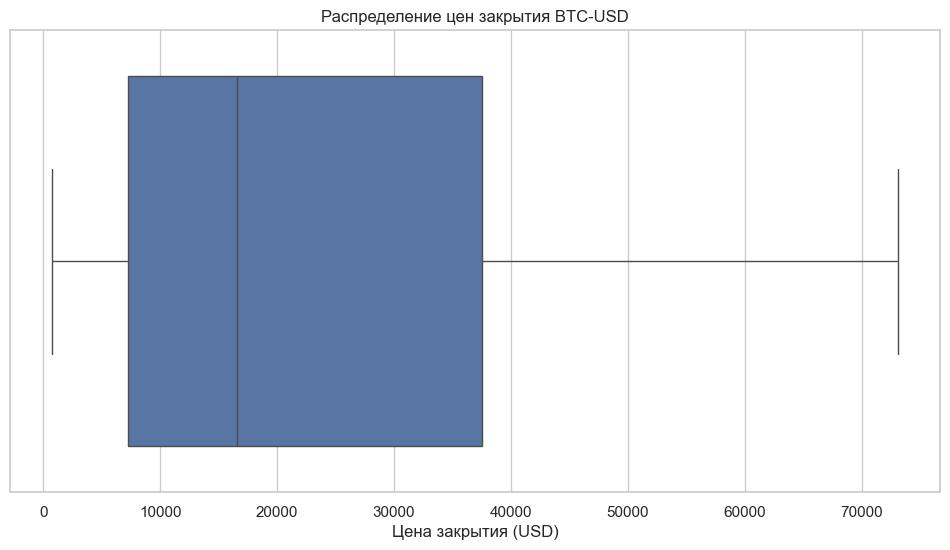

Проверка на пустые значения в наборе данных 'BTC-USD':
Series([], dtype: int64)




In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Close', data=df_btc)
plt.title('Распределение цен закрытия BTC-USD')
plt.xlabel('Цена закрытия (USD)')
plt.show()

check_missing_values(df_btc, "BTC-USD")

Видно, что выборка относительно сбалансированна, пустых значений нет.

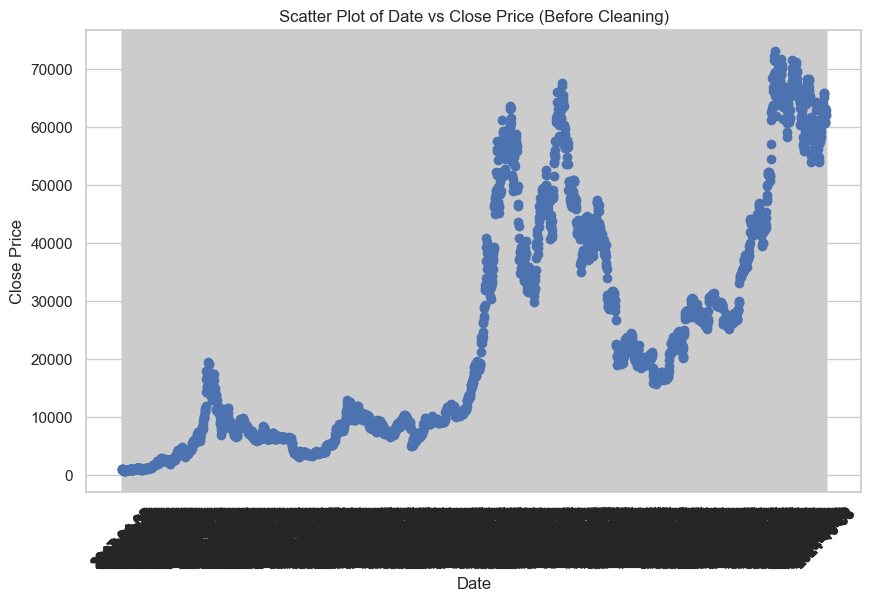

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df_btc['Date'], df_btc['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Date vs Close Price (Before Cleaning)')
plt.xticks(rotation=45)
plt.show()

Убираем шумы

Выбросы в BTC-USD Stock Data:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Price_Change]
Index: []


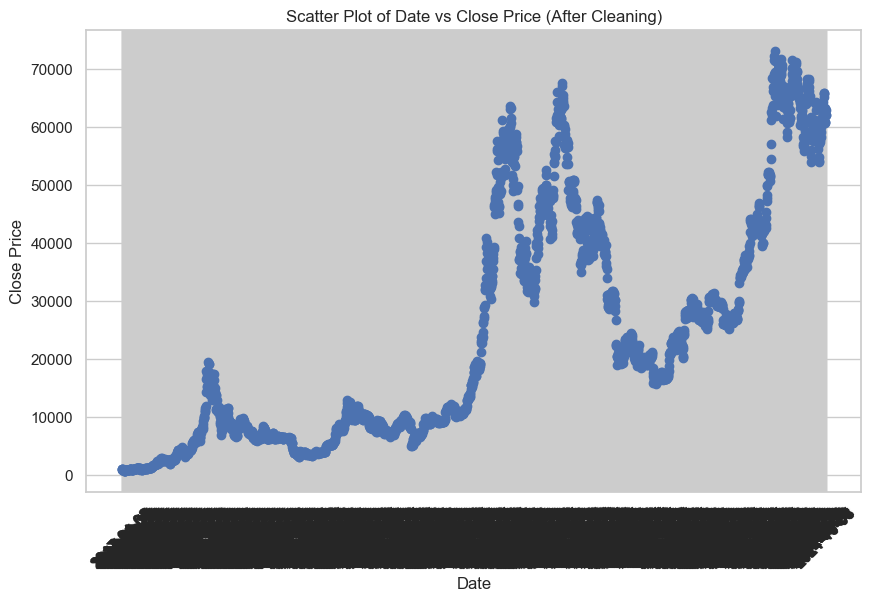

In [13]:
# Рассчитываем квартиль 1 (Q1) и квартиль 3 (Q3) для Close
Q1 = df_btc["Close"].quantile(0.25)
Q3 = df_btc["Close"].quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем порог для выбросов
threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

# Фильтруем выбросы
outliers = (df_btc["Close"] < lower_bound) | (df_btc["Close"] > upper_bound)

# Вывод выбросов
print("Выбросы в BTC-USD Stock Data:")
print(df_btc[outliers])

# Заменяем выбросы на медианные значения
median_close = df_btc["Close"].median()
df_btc.loc[outliers, "Close"] = median_close

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df_btc['Date'], df_btc['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Date vs Close Price (After Cleaning)')
plt.xticks(rotation=45)
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [14]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_btc, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 1701
Размер контрольной выборки: 567
Размер тестовой выборки: 568


Видим недостаток баланса:

In [15]:
def check_balance(df, name):
    counts = df['Price_Change'].value_counts()
    print(f"Распределение Price_Change в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Price_Change в обучающей выборке:
Price_Change
up      882
down    819
Name: count, dtype: int64

Распределение Price_Change в контрольной выборке:
Price_Change
up      301
down    266
Name: count, dtype: int64

Распределение Price_Change в тестовой выборке:
Price_Change
up      308
down    260
Name: count, dtype: int64



Используем oversample и undersample

In [16]:
train_df_oversampled = oversample(train_df, 'Price_Change')
val_df_oversampled = oversample(val_df, 'Price_Change')
test_df_oversampled = oversample(test_df, 'Price_Change')

train_df_undersampled = undersample(train_df, 'Price_Change')
val_df_undersampled = undersample(val_df, 'Price_Change')
test_df_undersampled = undersample(test_df, 'Price_Change')

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение Price_Change в обучающей выборке:
Price_Change
up      882
down    882
Name: count, dtype: int64

Распределение Price_Change в контрольной выборке:
Price_Change
down    301
up      301
Name: count, dtype: int64

Распределение Price_Change в тестовой выборке:
Price_Change
down    308
up      308
Name: count, dtype: int64

Андерсэмплинг:
Распределение Price_Change в обучающей выборке:
Price_Change
down    819
up      819
Name: count, dtype: int64

Распределение Price_Change в контрольной выборке:
Price_Change
down    266
up      266
Name: count, dtype: int64

Распределение Price_Change в тестовой выборке:
Price_Change
down    260
up      260
Name: count, dtype: int64



https://www.kaggle.com/datasets/junaid512/random-student-data-set-for-education-purpose
Набор данных включает случайные данные о студентах, которые используются для целей моделирования в сфере образования.
Примр цели — образовательная аналитика.
Входные данные: Полные имена студентов, Класс/программа обучения, Возраст, IQ, Совокупный средний балл успеваемости, Навыки

In [17]:
df_students = pd.read_csv(".//static//csv//student_data_01.csv")

print(df_students.columns)

Index(['Name', 'Class_or_Program', 'Age', 'Country', 'IQ', 'CGPA', 'Skill'], dtype='object')


Посмотрим краткое содержание датасета

In [18]:
print("\nИнформация о датасете BTC-USD:")
print(df_students.info())
df_students.head()


Информация о датасете BTC-USD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              50000 non-null  object 
 1   Class_or_Program  50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   IQ                50000 non-null  int64  
 5   CGPA              50000 non-null  float64
 6   Skill             50000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.7+ MB
None


Name Class_or_Program  Age                     Country   IQ  \
0   Catherine Owen             Arts   21                       Tonga  105   
1   Melissa Wright             10th   24        United Arab Emirates  102   
2       Laura Shaw             12th   18  Slovakia (Slovak Republic)  136   
3  Rodney Cummings             10th   17                    Barbados   83   
4    Barbara Hicks             12th   25                      Canada  129   

   CGPA            Skill  
0  3.18    Communication  
1  2.72       Leadership  
2  3.40    Communication  
3  2.49  Problem-solving  
4  2.39    Communication

Анализируем датафрейм при помощи "ящика с усами". Проверяет на пустые значения.

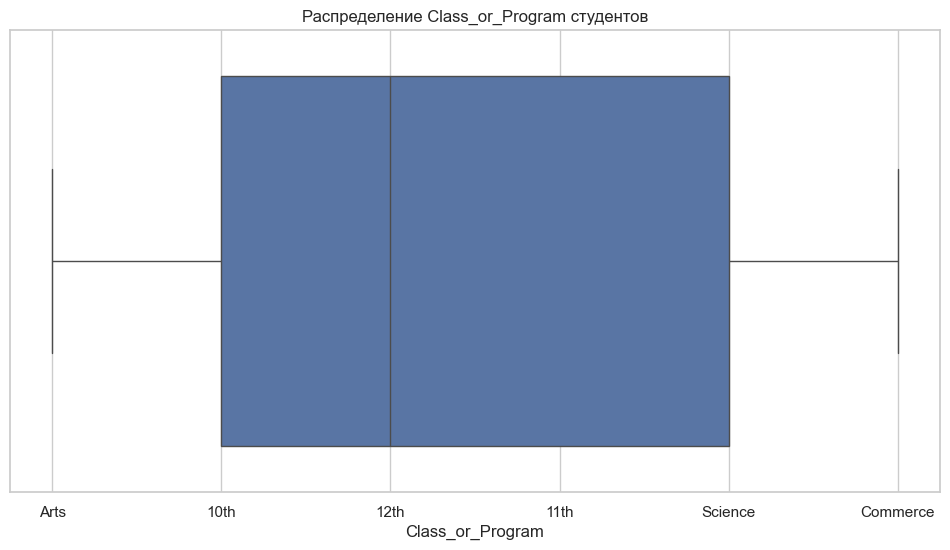

Проверка на пустые значения в наборе данных 'Student':
Series([], dtype: int64)




In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class_or_Program', data=df_students)
plt.title('Распределение Class_or_Program студентов')
plt.xlabel('Class_or_Program')
plt.show()

check_missing_values(df_students, "Student")

Видно, что выборка относительно сбалансированна, пустых значений нет.

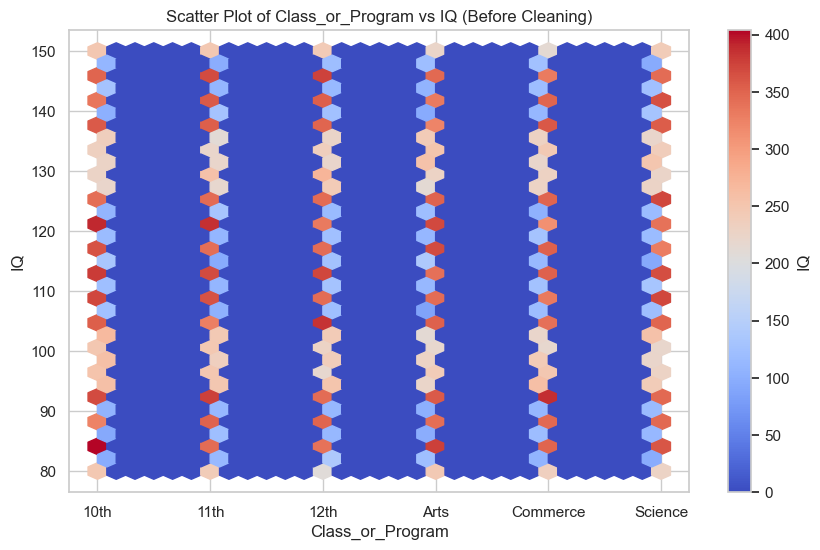

In [25]:
from sklearn.preprocessing import LabelEncoder

# Преобразование категориального столбца в числовой для hexbin
label_encoder = LabelEncoder()
df_students['Class_or_Program_encoded'] = label_encoder.fit_transform(df_students['Class_or_Program'])

# Визуализация плотности точек с использованием hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(df_students['Class_or_Program_encoded'], df_students['IQ'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='IQ')
# Настройка оси X, чтобы отображать текстовые метки вместо чисел
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.xlabel('Class_or_Program')
plt.ylabel('IQ')
plt.title('Scatter Plot of Class_or_Program vs IQ (Before Cleaning)')
plt.show()

Убираем шумы

Выбросы в Student Data:
Empty DataFrame
Columns: [Name, Class_or_Program, Age, Country, IQ, CGPA, Skill, Class_or_Program_encoded]
Index: []


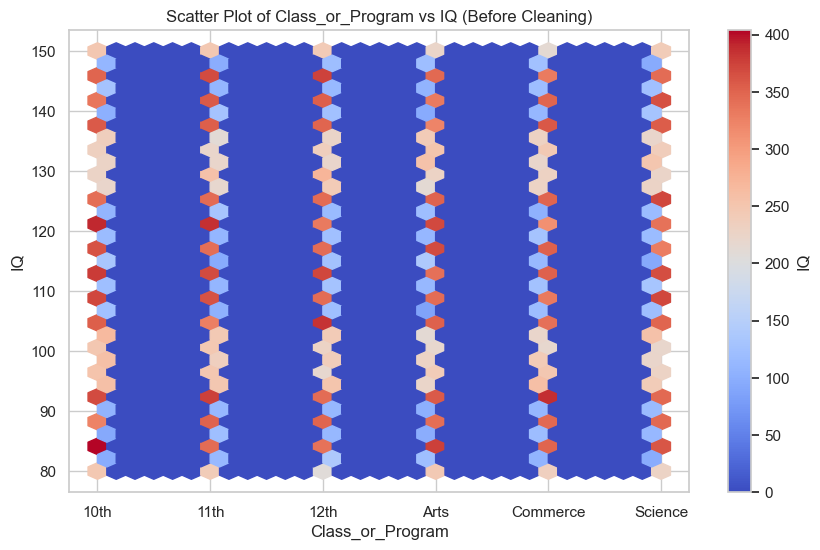

In [26]:
# Рассчитываем квартиль 1 (Q1) и квартиль 3 (Q3) для IQ
Q1 = df_students["IQ"].quantile(0.25)
Q3 = df_students["IQ"].quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем порог для выбросов
threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

# Фильтруем выбросы
outliers = (df_students["IQ"] < lower_bound) | (df_students["IQ"] > upper_bound)

# Вывод выбросов
print("Выбросы в Student Data:")
print(df_students[outliers])

# Заменяем выбросы на медианные значения
median_iq = df_students["IQ"].median()
df_students.loc[outliers, "IQ"] = median_iq

# Визуализация плотности точек с использованием hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(df_students['Class_or_Program_encoded'], df_students['IQ'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='IQ')
# Настройка оси X, чтобы отображать текстовые метки вместо чисел
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.xlabel('Class_or_Program')
plt.ylabel('IQ')
plt.title('Scatter Plot of Class_or_Program vs IQ (Before Cleaning)')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [22]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df_students, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 30000
Размер контрольной выборки: 10000
Размер тестовой выборки: 10000


Видим недостаток баланса

In [23]:
def check_balance(df, name):
    counts = df['Class_or_Program'].value_counts()
    print(f"Распределение Class_or_Program в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение Class_or_Program в обучающей выборке:
Class_or_Program
12th        5072
11th        5070
10th        5067
Commerce    4988
Science     4915
Arts        4888
Name: count, dtype: int64

Распределение Class_or_Program в контрольной выборке:
Class_or_Program
10th        1722
Science     1693
Arts        1676
12th        1661
11th        1637
Commerce    1611
Name: count, dtype: int64

Распределение Class_or_Program в тестовой выборке:
Class_or_Program
10th        1713
Science     1692
12th        1669
11th        1648
Commerce    1641
Arts        1637
Name: count, dtype: int64



Используем oversample и undersample

In [24]:
train_df_oversampled = oversample(train_df, 'Class_or_Program')
val_df_oversampled = oversample(val_df, 'Class_or_Program')
test_df_oversampled = oversample(test_df, 'Class_or_Program')

train_df_undersampled = undersample(train_df, 'Class_or_Program')
val_df_undersampled = undersample(val_df, 'Class_or_Program')
test_df_undersampled = undersample(test_df, 'Class_or_Program')

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение Class_or_Program в обучающей выборке:
Class_or_Program
10th        5072
12th        5072
Science     5072
11th        5072
Commerce    5072
Arts        5072
Name: count, dtype: int64

Распределение Class_or_Program в контрольной выборке:
Class_or_Program
Arts        1722
Science     1722
10th        1722
Commerce    1722
11th        1722
12th        1722
Name: count, dtype: int64

Распределение Class_or_Program в тестовой выборке:
Class_or_Program
Science     1713
11th        1713
Commerce    1713
12th        1713
10th        1713
Arts        1713
Name: count, dtype: int64

Андерсэмплинг:
Распределение Class_or_Program в обучающей выборке:
Class_or_Program
10th        4888
11th        4888
12th        4888
Arts        4888
Commerce    4888
Science     4888
Name: count, dtype: int64

Распределение Class_or_Program в контрольной выборке:
Class_or_Program
10th        1611
11th        1611
12th        1611
Arts        1611
Commerce    1611
Science     1611
Name: